# (3) Clustering
* team20 (안지은, 이정윤)

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) ## 지수로 출력안하고 소수점 두자리까지 출력

import csv
import numpy as np
from tqdm import tqdm
import pickle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px ## for visualization

import seaborn as sns ## for visualization
import matplotlib.pyplot as plt ## for visualization
from sklearn.decomposition import PCA ## for visualization

from sklearn.model_selection import train_test_split ## for spliting data
from sklearn.preprocessing import StandardScaler ## for Standardization
from sklearn.preprocessing import MinMaxScaler ## MinMax Normalization
from sklearn.cluster import KMeans ## Kmeans
from sklearn_extra.cluster import KMedoids ## KMedoids
from sklearn.cluster import DBSCAN ## DBSCAN
from sklearn.neighbors import NearestNeighbors ## for DBSCAN

import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score ## silhouette method
from yellowbrick.cluster.elbow import kelbow_visualizer ## elbow method

import pickle
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_total = pd.read_csv('./data/vehicles_1211.csv')
df_text = pd.read_csv('./data/vehicles_text_final.csv')

## Train, Test split

__Log 변환 O, Standard Scaler__

In [3]:
df_total_std = pd.read_csv('./data/df_total_std.csv')

In [4]:
log_std = df_total_std[['year','condition','sellingprice_log', 'odometer_log', 'mmr_log']].copy()
log_std_train, log_std_test = train_test_split(log_std, test_size=0.2, shuffle=True, random_state=1004) #stratify

__Log 변환 O, Minmax Scaler__

In [5]:
df_total_minmax = pd.read_csv('./data/df_total_minmax.csv')

In [6]:
log_minmax = df_total_minmax[['year','condition','sellingprice_log', 'odometer_log', 'mmr_log']].copy()
log_minmax_train, log_minmax_test = train_test_split(log_minmax, test_size=0.2, shuffle=True, random_state=1004) #stratify

__Log 변환 X, Minmax Scaler__

In [7]:
nonlog_minmax = df_total_minmax[['year','condition','sellingprice', 'odometer', 'mmr']].copy()
nonlog_minmax_train, nonlog_minmax_test = train_test_split(nonlog_minmax, test_size=0.2, shuffle=True, random_state=1004) #stratify

## Clustering

In [8]:
scoretable = {}

def clusterModel(kNum, rNum, train, test):
    K = kNum ### 임의로 K값을 설정함.
    Rstate = rNum
    
    model = KMeans(n_clusters = K, random_state = Rstate).fit(train)
    test['K-Means_cluster'] = model.fit_predict(test) ### 클러스터링 진행한 결과

    # 실루엣 스코어
    score = silhouette_score(test, test['K-Means_cluster'], metric='euclidean')
    scoretable[K] = score
    return print(score)

#### (1) Find best feature scale options
- mmr, odometer, selling price 값의 log 정규화 여부, 스케일러 종류에 따른 클러스터링 성능 비교
- 단, standard scaler의 경우, 분산값을 기준으로 스케일링 하므로 log 변환값으로 진행하는 것이 유의미하므로 로그를 적용하지 않은 스케일링은 비교군에서 제외    

__Log 변환 O, Standard Scaler__

In [ ]:
clusterModel(100, 8, log_std_train, log_std_test)

0.6900683178568613


__Log 변환 O, Minmax Scaler__

In [ ]:
clusterModel(100, 8, log_minmax_train, log_minmax_test)

0.8872816749503704


__Log 변환 X, Minmax Scaler__

In [ ]:
clusterModel(100, 8, nonlog_minmax_train, nonlog_minmax_test)

0.8889483137807846


__Conculsion__
- log값을 적용하지 않은 상태에서 Minmax Scaler를 사용해 스케일링 하였을 때의 실루엣 계수가 가장 높았음을 확인할 수 있음.

In [ ]:
df_total = df_total_minmax[['index_original','year_original','vin_original','make_original','condition_original','sellingprice_original',
                      'odometer_original', 'mmr_original','year','condition','odometer','mmr','sellingprice']].copy()
df_total = pd.merge(df_total, df_text[['index', 'color','interior']], left_on="index_original", right_on="index", how="inner")

In [ ]:
df_total_minmax

,index_original,year_original,make_original,vin_original,condition_original,odometer_original,mmr_original,sellingprice_original,year,condition,odometer,mmr,sellingprice,sellingprice_log,odometer_log,mmr_log,index
0,0,2015,Kia,5xyktca69fg566472,5.00,16639.00,20500,21500,1.00,1.00,0.06,0.46,0.47,0.68,0.38,0.67,0
1,1,2015,Kia,5xyktca69fg561319,5.00,9393.00,20800,21500,1.00,1.00,0.04,0.47,0.47,0.68,0.31,0.68,1
2,2,2014,BMW,wba3c1c51ek116351,4.50,1331.00,31900,30000,0.96,0.88,0.00,0.71,0.66,0.81,0.16,0.84,2
3,3,2015,Volvo,yv1612tb4f1310987,4.10,14282.00,27500,27750,1.00,0.77,0.05,0.61,0.61,0.77,0.36,0.78,3
4,4,2015,Nissan,1n4al3ap1fn326013,1.00,5554.00,15350,10900,1.00,0.00,0.02,0.34,0.24,0.48,0.26,0.58,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434980,434983,2011,BMW,wbafr1c53bc744672,3.90,66403.00,20300,22800,0.84,0.72,0.25,0.45,0.50,0.70,0.62,0.67,434983
434981,434984,2012,Ram,3c6td5et6cg112407,5.00,54393.00,30200,30800,0.88,1.00,0.20,0.68,0.67,0.82,0.58,0.82,434984
434982,434985,2012,BMW,5uxzw0c58cl668465,4.80,50561.00,29800,34000,0.88,0.95,0.19,0.67,0.74,0.86,0.56,0.81,434985
434983,434986,2015,Nissan,1n4al3ap0fc216050,3.80,16658.00,15100,11100,1.00,0.70,0.06,0.34,0.24,0.48,0.38,0.57,434986


In [ ]:
df_total

,index_original,year_original,vin_original,make_original,condition_original,sellingprice_original,odometer_original,mmr_original,year,condition,odometer,mmr,sellingprice,index,color,interior
0,0,2015,5xyktca69fg566472,Kia,5.00,21500,16639.00,20500,1.00,1.00,0.06,0.46,0.47,0,white,black
1,1,2015,5xyktca69fg561319,Kia,5.00,21500,9393.00,20800,1.00,1.00,0.04,0.47,0.47,1,white,beige
2,2,2014,wba3c1c51ek116351,BMW,4.50,30000,1331.00,31900,0.96,0.88,0.00,0.71,0.66,2,gray,black
3,3,2015,yv1612tb4f1310987,Volvo,4.10,27750,14282.00,27500,1.00,0.77,0.05,0.61,0.61,3,white,black
4,4,2015,1n4al3ap1fn326013,Nissan,1.00,10900,5554.00,15350,1.00,0.00,0.02,0.34,0.24,4,gray,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405367,434982,2012,2c4rdgbg1cr349287,Dodge,3.70,7800,97036.00,8300,0.88,0.68,0.36,0.19,0.17,434982,white,gray
405368,434983,2011,wbafr1c53bc744672,BMW,3.90,22800,66403.00,20300,0.84,0.72,0.25,0.45,0.50,434983,blue,black
405369,434984,2012,3c6td5et6cg112407,Ram,5.00,30800,54393.00,30200,0.88,1.00,0.20,0.68,0.67,434984,black,black
405370,434986,2015,1n4al3ap0fc216050,Nissan,3.80,11100,16658.00,15100,1.00,0.70,0.06,0.34,0.24,434986,black,black


In [ ]:
df_total.to_csv('./data/vehicles_prerocessing_1211.csv')

#### (2) Find Best K value

In [9]:
scoretable = {}

def FindK(kNum, rNum, train, test):
    K = kNum ### 임의로 K값을 설정함.
    
    Rstate = rNum
    
    model = KMeans(n_clusters = K, random_state = Rstate).fit(train)
    test['K-Means_cluster'] = model.fit_predict(test) ### 클러스터링 진행한 결과

In [ ]:
for i in tqdm(range(20, 501, 50)):
    clusterModel(i, 8, nonlog_minmax_train, nonlog_minmax_test)
px.line(x=list(scoretable.keys()), y=list(scoretable.values()), title='Silhouette Score by K')

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [03:46<34:01, 226.87s/it]

0.8363829341322889


 20%|██        | 2/10 [08:52<36:24, 273.04s/it]

0.8693391230453171


 30%|███       | 3/10 [14:43<36:00, 308.68s/it]

0.8850293703134684


 40%|████      | 4/10 [21:25<34:34, 345.76s/it]

0.8944115192833721


 50%|█████     | 5/10 [29:49<33:33, 402.70s/it]

0.8987271881736815


 60%|██████    | 6/10 [39:46<31:14, 468.69s/it]

0.9040455181428501


 70%|███████   | 7/10 [51:26<27:13, 544.36s/it]

0.9065212648011631


 80%|████████  | 8/10 [1:05:32<21:20, 640.33s/it]

0.9096301469551302


 90%|█████████ | 9/10 [1:22:39<12:41, 761.40s/it]

0.9123316835315751


100%|██████████| 10/10 [1:45:24<00:00, 632.44s/it]

0.9145360740746505


#### (3) Training Model

In [10]:
df_total = pd.read_csv('./data/vehicles_prerocessing_final.csv')

In [11]:
df_total

,Unnamed: 0,index_original,year_original,make_original,vin_original,condition_original,odometer_original,mmr_original,sellingprice_original,year,...,mmr,sellingprice,sellingprice_log,odometer_log,mmr_log,index_x,index_y,color,interior,K-Means_cluster
0,0,0,2015,Kia,5xyktca69fg566472,5.00,16639.00,20500,21500,1.00,...,0.46,0.47,0.68,0.38,0.67,0,0,white,black,426
1,1,1,2015,Kia,5xyktca69fg561319,5.00,9393.00,20800,21500,1.00,...,0.47,0.47,0.68,0.31,0.68,1,1,white,beige,426
2,2,2,2014,BMW,wba3c1c51ek116351,4.50,1331.00,31900,30000,0.96,...,0.71,0.66,0.81,0.16,0.84,2,2,gray,black,305
3,3,3,2015,Volvo,yv1612tb4f1310987,4.10,14282.00,27500,27750,1.00,...,0.61,0.61,0.77,0.36,0.78,3,3,white,black,272
4,4,4,2015,Nissan,1n4al3ap1fn326013,1.00,5554.00,15350,10900,1.00,...,0.34,0.24,0.48,0.26,0.58,4,4,gray,black,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434980,434980,466252,2011,BMW,wbafr1c53bc744672,3.90,66403.00,20300,22800,0.84,...,0.45,0.50,0.70,0.62,0.67,466252,466252,white,other,35
434981,434981,466253,2012,Ram,3c6td5et6cg112407,5.00,54393.00,30200,30800,0.88,...,0.68,0.67,0.82,0.58,0.82,466253,466253,white,black,267
434982,434982,466254,2012,BMW,5uxzw0c58cl668465,4.80,50561.00,29800,34000,0.88,...,0.67,0.74,0.86,0.56,0.81,466254,466254,black,black,267
434983,434983,466255,2015,Nissan,1n4al3ap0fc216050,3.80,16658.00,15100,11100,1.00,...,0.34,0.24,0.48,0.38,0.57,466255,466255,white,black,63


In [12]:
df_total.columns

Index(['Unnamed: 0', 'index_original', 'year_original', 'make_original',
       'vin_original', 'condition_original', 'odometer_original',
       'mmr_original', 'sellingprice_original', 'year', 'condition',
       'odometer', 'mmr', 'sellingprice', 'sellingprice_log', 'odometer_log',
       'mmr_log', 'index_x', 'index_y', 'color', 'interior',
       'K-Means_cluster'],
      dtype='object')

#### (4) Data Labeling with Clustering

In [ ]:
K = 500
cluster_data = df_total_minmax[['year','condition','sellingprice', 'odometer', 'mmr']].copy()

model = KMeans(n_clusters = K, random_state = 8).fit(cluster_data)

In [ ]:
df_total['K-Means_cluster'] = model.fit_predict(cluster_data) ### 클러스터링 진행한 결과
df_total

,index_original,year_original,make_original,vin_original,condition_original,odometer_original,mmr_original,sellingprice_original,year,condition,...,mmr,sellingprice,sellingprice_log,odometer_log,mmr_log,index_x,index_y,color,interior,K-Means_cluster
0,0,2015,Kia,5xyktca69fg566472,5.00,16639.00,20500,21500,1.00,1.00,...,0.46,0.47,0.68,0.38,0.67,0,0,white,black,426
1,1,2015,Kia,5xyktca69fg561319,5.00,9393.00,20800,21500,1.00,1.00,...,0.47,0.47,0.68,0.31,0.68,1,1,white,beige,426
2,2,2014,BMW,wba3c1c51ek116351,4.50,1331.00,31900,30000,0.96,0.88,...,0.71,0.66,0.81,0.16,0.84,2,2,gray,black,305
3,3,2015,Volvo,yv1612tb4f1310987,4.10,14282.00,27500,27750,1.00,0.77,...,0.61,0.61,0.77,0.36,0.78,3,3,white,black,272
4,4,2015,Nissan,1n4al3ap1fn326013,1.00,5554.00,15350,10900,1.00,0.00,...,0.34,0.24,0.48,0.26,0.58,4,4,gray,black,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434980,466252,2011,BMW,wbafr1c53bc744672,3.90,66403.00,20300,22800,0.84,0.72,...,0.45,0.50,0.70,0.62,0.67,466252,466252,white,other,35
434981,466253,2012,Ram,3c6td5et6cg112407,5.00,54393.00,30200,30800,0.88,1.00,...,0.68,0.67,0.82,0.58,0.82,466253,466253,white,black,267
434982,466254,2012,BMW,5uxzw0c58cl668465,4.80,50561.00,29800,34000,0.88,0.95,...,0.67,0.74,0.86,0.56,0.81,466254,466254,black,black,267
434983,466255,2015,Nissan,1n4al3ap0fc216050,3.80,16658.00,15100,11100,1.00,0.70,...,0.34,0.24,0.48,0.38,0.57,466255,466255,white,black,63


In [ ]:
df_total.to_csv('./data/vehicles_prerocessing_final.csv')

#### (5) Save Model

In [ ]:
with open('./model/kmeans_500_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#df_total.drop(['index_original', 'color','interior'], axis=1, inplace=True) # 무의미한 컬럼 제거
df_total["cluster_mean_price"] = df_total.groupby("K-Means_cluster").sellingprice_original.transform("mean") # 클러스터 별 평균
df_total

,year_original,make_original,vin_original,condition_original,odometer_original,mmr_original,sellingprice_original,year,condition,odometer,mmr,sellingprice,sellingprice_log,odometer_log,mmr_log,index_x,index_y,K-Means_cluster,cluster_mean_price
0,2015,Kia,5xyktca69fg566472,5.00,16639.00,20500,21500,1.00,1.00,0.06,0.46,0.47,0.68,0.38,0.67,0,0,426,20557.45
1,2015,Kia,5xyktca69fg561319,5.00,9393.00,20800,21500,1.00,1.00,0.04,0.47,0.47,0.68,0.31,0.68,1,1,426,20557.45
2,2014,BMW,wba3c1c51ek116351,4.50,1331.00,31900,30000,0.96,0.88,0.00,0.71,0.66,0.81,0.16,0.84,2,2,305,28997.63
3,2015,Volvo,yv1612tb4f1310987,4.10,14282.00,27500,27750,1.00,0.77,0.05,0.61,0.61,0.77,0.36,0.78,3,3,272,29101.60
4,2015,Nissan,1n4al3ap1fn326013,1.00,5554.00,15350,10900,1.00,0.00,0.02,0.34,0.24,0.48,0.26,0.58,4,4,347,7808.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434980,2011,BMW,wbafr1c53bc744672,3.90,66403.00,20300,22800,0.84,0.72,0.25,0.45,0.50,0.70,0.62,0.67,466252,466252,35,21746.27
434981,2012,Ram,3c6td5et6cg112407,5.00,54393.00,30200,30800,0.88,1.00,0.20,0.68,0.67,0.82,0.58,0.82,466253,466253,267,33032.27
434982,2012,BMW,5uxzw0c58cl668465,4.80,50561.00,29800,34000,0.88,0.95,0.19,0.67,0.74,0.86,0.56,0.81,466254,466254,267,33032.27
434983,2015,Nissan,1n4al3ap0fc216050,3.80,16658.00,15100,11100,1.00,0.70,0.06,0.34,0.24,0.48,0.38,0.57,466255,466255,63,14331.31


## Create Result Set

In [ ]:
df_total['index_original'] = df_total.index
df_final = df_total[['index_original', 'year_original', 'make_original',
       'condition_original', 'odometer_original', 'mmr_original',
       'sellingprice_original', 'K-Means_cluster']].copy()
df_final

,index_original,year_original,make_original,condition_original,odometer_original,mmr_original,sellingprice_original,K-Means_cluster
0,0,2015,Kia,5.00,16639.00,20500,21500,426
1,1,2015,Kia,5.00,9393.00,20800,21500,426
2,2,2014,BMW,4.50,1331.00,31900,30000,305
3,3,2015,Volvo,4.10,14282.00,27500,27750,272
4,4,2015,Nissan,1.00,5554.00,15350,10900,347
...,...,...,...,...,...,...,...,...
434980,434980,2011,BMW,3.90,66403.00,20300,22800,35
434981,434981,2012,Ram,5.00,54393.00,30200,30800,267
434982,434982,2012,BMW,4.80,50561.00,29800,34000,267
434983,434983,2015,Nissan,3.80,16658.00,15100,11100,63


In [ ]:
result = df_final.groupby('K-Means_cluster').agg({
    'year_original': [lambda x: x.value_counts().index[0]],
    'make_original': [lambda x: x.value_counts().index[0]],
    'condition_original': ['mean', 'median', 'max', 'min'],
    'odometer_original': ['mean', 'median', 'max', 'min'],
    'mmr_original': ['mean', 'median', 'max', 'min'],
    'sellingprice_original': ['mean', 'median', 'max', 'min']
})

# 컬럼명 재설정
result.columns = [
    'count_year',
    'count_make',
    'mean_condition',
    'median_condition',
    'max_condition',
    'min_condition',
    'mean_odometer',
    'median_odometer',
    'max_odometer',
    'min_odometer',
    'mean_mmr',
    'median_mmr',
    'max_mmr',
    'min_mmr',
    'mean_sellingprice',
    'median_sellingprice',
    'max_sellingprice',
    'min_sellingprice'
]

# 결과 출력
result


,count_year,count_make,mean_condition,median_condition,max_condition,min_condition,mean_odometer,median_odometer,max_odometer,min_odometer,mean_mmr,median_mmr,max_mmr,min_mmr,mean_sellingprice,median_sellingprice,max_sellingprice,min_sellingprice
K-Means_cluster,,,,,,,,,,,,,,,,,,
0,2014,Ford,4.34,4.30,4.50,4.20,32626.40,32488.00,52430.00,19817.00,18354.09,18350.00,21500,14400,18608.82,18500.00,22600,14000
1,2006,Chevrolet,1.02,1.00,1.40,1.00,93371.93,95279.50,121681.00,54725.00,5070.03,5050.00,10850,1200,2597.80,2400.00,7000,275
2,2010,Chevrolet,3.62,3.60,4.00,3.40,96668.79,96588.00,116064.00,79289.00,5657.02,5675.00,8425,2725,5847.27,6000.00,9000,1500
3,2006,Chevrolet,1.97,1.90,2.40,1.50,197723.43,196796.00,222992.00,180546.00,2314.36,2100.00,7175,75,2100.36,1950.00,5800,300
4,2011,Nissan,2.78,2.80,3.10,2.40,53530.59,53451.00,70976.00,26759.00,12303.73,12250.00,19000,9225,11873.14,11800.00,15400,7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2011,Ford,3.62,3.60,4.00,3.20,70477.22,69606.00,106192.00,44077.00,28509.24,28400.00,34900,20500,28560.22,28500.00,35600,23900
496,2011,Mercedes-Benz,2.14,2.10,2.60,1.60,61014.95,58233.00,116793.00,22273.00,31304.31,31400.00,37500,22000,29311.25,29000.00,40600,22700
497,2012,Ford,4.85,4.80,5.00,4.60,23569.17,23694.00,42109.00,2494.00,16219.91,16150.00,22400,10450,16766.69,16800.00,21500,10800


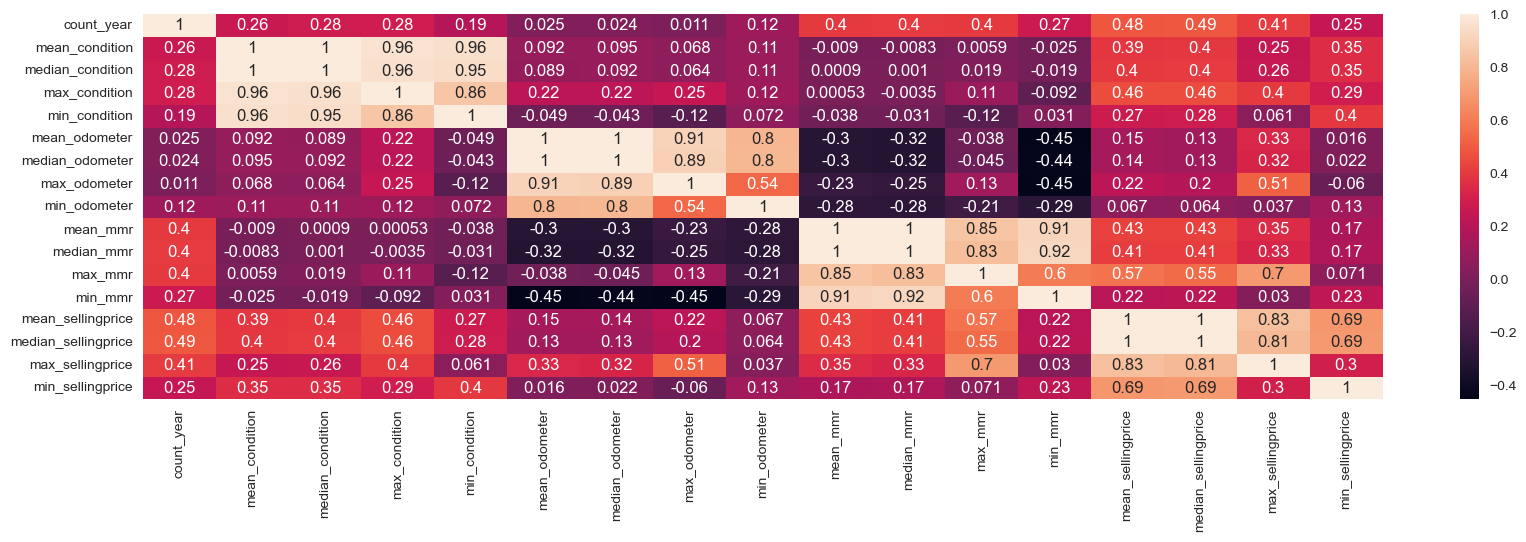

In [ ]:
plt.figure(figsize = (20, 5))
sns.heatmap(result.corr(),annot=True)
plt.show()

In [ ]:
result.to_excel('./data/model_result_bygroup_final.xlsx')